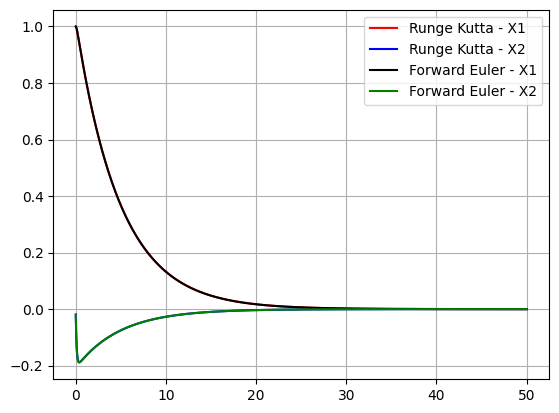

In [15]:
import numpy as np
from matplotlib import pyplot as plt

A = np.array([[0,1],[-2,-10]])

def F(x):
    '''x : vector of inputs of the state space system (so x1, x2)'''
    return A@x

def Runge_Kutta(F,x,dt, ttot):
    '''Inputs:
    F: function representative of the state space /
      dt: time step 
    ttot: total simulation time
    
    Returns array of timesteps and array of values of x'''

    xtab = []
    ttab = []
    t = 0

    while t<ttot:
        k1 = F(x)
        k2 = F(x + (dt/2)*k1)
        k3 = F(x + (dt/2)*k2)
        k4 = F(x + dt*k3)
        x = x + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

        xtab.append(x)
        ttab.append(t)
        
        t += dt

    return np.array(ttab), np.array(xtab)

def Forward_Euler(F,x,dt,ttot):
    
    xtab = []
    ttab = []
    t = 0

    while t<ttot:

        x = x + dt * F(x)
        xtab.append(x)
        ttab.append(t)
        
        t += dt

    return np.array(ttab), np.array(xtab)

def plot(x_rk,y_rk, x_fe, y_fe):
    fig,ax = plt.subplots()

    ax.plot(x_rk,y_rk[:,0],label='Runge Kutta - X1', color = 'red')
    ax.plot(x_rk,y_rk[:,1],label='Runge Kutta - X2', color = 'blue')
    ax.plot(x_fe,y_fe[:,0],label='Forward Euler - X1', color = 'black')
    ax.plot(x_fe,y_fe[:,1],label='Forward Euler - X2', color = 'green')
    ax.legend()
    ax.grid()
    plt.show()

%matplotlib inline

x_init = np.array([[1],[0]])
trk,xrk = Runge_Kutta(F,x_init,0.01,50)
tfe,xfe = Forward_Euler(F,x_init,0.01,50)

plot(trk, xrk, tfe, xfe)


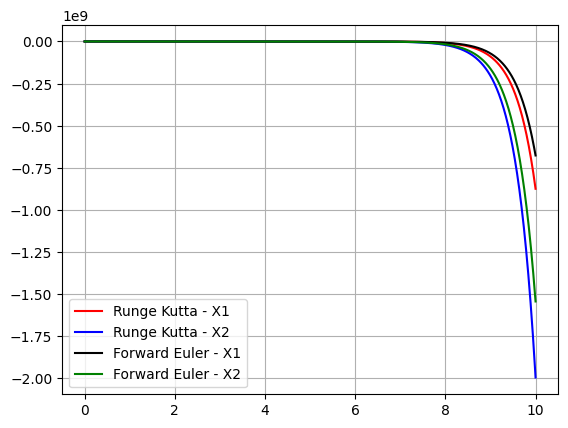

In [19]:
A = np.array([[0, 1],[-1/2, 5/2]])

x_init2 = np.array([[1],[0]])
trk2,xrk2 = Runge_Kutta(F,x_init2,0.01,10)
tfe2,xfe2 = Forward_Euler(F,x_init2,0.01,10)

plot(trk2, xrk2, tfe2, xfe2)
    

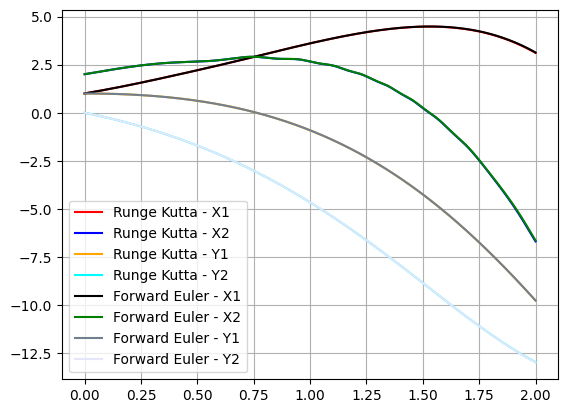

In [26]:
def F(x, t):
    x_1 = x[0][0]
    x_2 = x[1][0]
    y_1 = x[2][0]
    y_2 = x[3][0]
    
    return np.array([[x_2],[2 * y_1 - np.sin(4 * t**2 * x_1)],
                     [y_2],[-2 * x_1 - 1 / (2 * t**2 * x_2 ** 2 + 3)]])


def Runge_Kutta(F,x,dt, ttot):
    '''Inputs:
    F: function representative of the state space /
      dt: time step 
    ttot: total simulation time
    
    Returns array of timesteps and array of values of x'''

    xtab = []
    ttab = []
    t = 0

    while t<ttot:
        k1 = F(x,t)
        k2 = F(x + (dt/2)*k1,t + dt/2)
        k3 = F(x + (dt/2)*k2, t + dt/2)
        k4 = F(x + dt*k3, t + dt)
        x = x + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

        xtab.append(x)
        ttab.append(t)
        
        t += dt

    return np.array(ttab), np.array(xtab)

def Forward_Euler(F,x,dt,ttot):
    
    xtab = []
    ttab = []
    t = 0

    while t<ttot:

        x = x + dt * F(x,t)
        xtab.append(x)
        ttab.append(t)
        
        t += dt

    return np.array(ttab), np.array(xtab)

def plot2(x_rk,y_rk, x_fe, y_fe):
    fig,ax = plt.subplots()

    ax.plot(x_rk,y_rk[:,0],label='Runge Kutta - X1', color = 'red')
    ax.plot(x_rk,y_rk[:,1],label='Runge Kutta - X2', color = 'blue')
    ax.plot(x_rk,y_rk[:,2],label='Runge Kutta - Y1', color = 'orange')
    ax.plot(x_rk,y_rk[:,3],label='Runge Kutta - Y2', color = 'cyan')
    ax.plot(x_fe,y_fe[:,0],label='Forward Euler - X1', color = 'black')
    ax.plot(x_fe,y_fe[:,1],label='Forward Euler - X2', color = 'green')
    ax.plot(x_fe,y_fe[:,2],label='Forward Euler - Y1', color = 'slategrey')
    ax.plot(x_fe,y_fe[:,3],label='Forward Euler - Y2', color = 'lavender')

    ax.legend()
    ax.grid()
    plt.show()

x_init = np.array([[1],[2],[1],[0]])

trk,xrk = Runge_Kutta(F,x_init,0.001,2)
tfe,xfe = Forward_Euler(F,x_init,0.001,2)

plot2(trk, xrk, tfe, xfe)